# Predicting User Knowledge Levels Through Study Habits and Exam Performance Analysis

#### Junseo Park Michaela Ahkong Teresa Yao Lia Sayers 

# Introduction

        This study aims to analyze the “User Knowledge Modeling” data set retrieved from the UC Irvine Machine Learning Repository (Kahraman et al., 2013). This dataset is based on data from the Phd.D. Thesis of Dr. Hamdi Tolga Kahraman regarding the knowledge class of students concerning Electrical DC Machines (Kahraman et al., 2013). In addition to knowledge level (UNS), it contains the degree of study time for goal object materials (STG), degree of repetition number for goal object materials (SCG), exam performance for goal objects (PEG), degree of study time for related objects (STR), and exam performance for related objects (LPR) of the 403 students. Dr. Kahraman and his team classified users’ knowledge levels using a Bayesian classifier and K-nearest neighbour classifier. They later developed an intuitive knowledge classifier which outperformed the Bayesian classifier and K-nearest neighbours classifier.

        Analysis of this data set will assist with the exploration of the following predictive question: Can we predict whether a user will have a very low, low, middle, or high knowledge level (UNS) concerning Electrical DC Machines based on their degree of study time for goal object materials (STG), degree of repetition number for goal object materials (SCG), exam performance for goal objects (PEG), degree of study time for related objects (STR), and exam performance for related objects (LPR)?


## 1. Splitting the data into a training and test set

In [1]:
import altair as alt  
import pandas as pd  
import numpy as np 
import random 

from sklearn import set_config  
from sklearn.compose import make_column_transformer  
from sklearn.metrics.pairwise import euclidean_distances 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import make_pipeline  
from sklearn.preprocessing import OneHotEncoder, StandardScaler  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_validate

In [2]:
# Read data from CSV file
data = pd.read_csv("data/User_Knowledge_Modeling.csv")
data.head(10)

,STG,SCG,STR,LPR,PEG,UNS,Unnamed: 6,Unnamed: 7,Attribute Information:
0,0.00,0.00,0.00,0.00,0.00,very_low,NaN,NaN,STG (The degree of study time for goal object ...
1,0.08,0.08,0.10,0.24,0.90,High,NaN,NaN,SCG (The degree of repetition number of user f...
2,0.06,0.06,0.05,0.25,0.33,Low,NaN,NaN,STR (The degree of study time of user for rela...
3,0.10,0.10,0.15,0.65,0.30,Middle,NaN,NaN,LPR (The exam performance of user for related ...
4,0.08,0.08,0.08,0.98,0.24,Low,NaN,NaN,PEG (The exam performance of user for goal obj...
5,0.09,0.15,0.40,0.10,0.66,Middle,NaN,NaN,UNS (The knowledge level of user)
6,0.10,0.10,0.43,0.29,0.56,Middle,NaN,NaN,NaN
7,0.15,0.02,0.34,0.40,0.01,very_low,NaN,NaN,NaN
8,0.20,0.14,0.35,0.72,0.25,Low,NaN,NaN,NaN
9,0.00,0.00,0.50,0.20,0.85,High,NaN,NaN,NaN


Table 1. Preliminary User Knowledge Modeling Data

In [3]:
# Assign UNS values to labels variable and drop it from the data frame
labels = data[" UNS"]

# Filter the data to select specific columns
filtered_data_1 = data[["STG", "SCG", "STR", "LPR", "PEG", " UNS"]]
filtered_data_1.head(10) 

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
5,0.09,0.15,0.40,0.10,0.66,Middle
6,0.10,0.10,0.43,0.29,0.56,Middle
7,0.15,0.02,0.34,0.40,0.01,very_low
8,0.20,0.14,0.35,0.72,0.25,Low
9,0.00,0.00,0.50,0.20,0.85,High


Table 2. Focused User Knowledge Metrics and Levels

In [4]:
# Create a scatter plot using Altair
scatter_plot_stg = alt.Chart(filtered_data_1).mark_point().encode(
    x=alt.X("STG").title("The degree of study time for goal object materials"),  # X-axis representing the degree of study time
    y=alt.Y("PEG").title("The user performance in exam").scale(zero=False),  # Y-axis representing the user performance in exam
    color=alt.Color(' UNS',  
        scale=alt.Scale(
            domain=['very_low', 'Low', 'Middle', 'High'],  # Domain of UNS values
            range=['red', 'yellow', 'green', 'blue']  # Corresponding color range
        )
    )
).properties(
    title='Figure 1. STG vs PEG'  # Title of the scatter plot
)

# Additional scatter plot for SCG vs PEG
scatter_plot_scg = alt.Chart(filtered_data_1).mark_point().encode(
    x=alt.X("SCG").title("The degree of repetition number of user for goal object materials"),
    y=alt.Y("PEG").title("The user performance in exam").scale(zero=False),
    color=alt.Color(' UNS', 
        scale=alt.Scale(
            domain=['very_low', 'Low', 'Middle', 'High'],
            range=['red', 'yellow', 'green', 'blue']
        )
    )
).properties(
    title='Figure 2. SCG vs PEG',
)

# Additional scatter plot for LPR vs STR
scatter_plot_lpr = alt.Chart(filtered_data_1).mark_point().encode(
    x=alt.X("LPR").title("Exam performance for related objects"),
    y=alt.Y("STR").title("The degree of study time for related objects").scale(zero=False),
    color=alt.Color(' UNS', 
        scale=alt.Scale(
            domain=['very_low', 'Low', 'Middle', 'High'],
            range=['red', 'yellow', 'green', 'blue']
        )
    )
).properties(
    title='Figure 3. LPR vs STR',
)

# Combining the charts side by side
combined_charts = alt.hconcat(scatter_plot_stg, scatter_plot_scg,scatter_plot_lpr).resolve_scale(color='independent')

# Display the combined charts
combined_charts

alt.HConcatChart(...)

In [5]:
#we will determine which predictors should we use to find the highest prediction for UNS
predictor_columns = ['STG', 'SCG', 'STR', 'LPR', 'PEG']

predictors = data[predictor_columns]

# Calculate the correlation matrix of predictor variables and reset the index to convert the index into a column
correlation_matrix = predictors.corr().reset_index()

# # Transform the correlation matrix into a long format for Altair
correlation_matrix_long = correlation_matrix.melt('index')
correlation_matrix_long.head(10)

,index,variable,value
0,STG,STG,1.000000
1,SCG,STG,0.081035
2,STR,STG,0.040841
3,LPR,STG,0.099543
4,PEG,STG,0.206359
5,STG,SCG,0.081035
6,SCG,SCG,1.000000
7,STR,SCG,0.083732
8,LPR,SCG,0.097816
9,PEG,SCG,0.182792


Table 3. Correlation Analysis of User Study Metrics

In [6]:
# Create a heatmap 
heatmap = alt.Chart(correlation_matrix_long).mark_rect().encode(
    x=alt.X('index', axis=alt.Axis(title='Predictor Variables')),
    y=alt.Y('variable', axis=alt.Axis(title='Predictor Variables')),
    color=alt.Color('value', scale=alt.Scale(domain=(-1, 1), scheme='redblue'))
).properties(
    title='Figure 4. Heatmap of Predictor Variable Correlations',
    width=300,
    height=300
)

# Create text labels for the correlation values
text = heatmap.mark_text().encode(
    
    text=alt.Text('value', format='.2f'),
    color=alt.condition(
        alt.datum.value > 0.5,
        alt.value('white'),
        alt.value('black')
    )
)

correlation_chart = heatmap + text

correlation_chart 

alt.LayerChart(...)

In [7]:
filtered_data_2 = filtered_data_1.drop([" UNS"], axis=1)
filtered_data_2.head(10)

,STG,SCG,STR,LPR,PEG
0,0.00,0.00,0.00,0.00,0.00
1,0.08,0.08,0.10,0.24,0.90
2,0.06,0.06,0.05,0.25,0.33
3,0.10,0.10,0.15,0.65,0.30
4,0.08,0.08,0.08,0.98,0.24
5,0.09,0.15,0.40,0.10,0.66
6,0.10,0.10,0.43,0.29,0.56
7,0.15,0.02,0.34,0.40,0.01
8,0.20,0.14,0.35,0.72,0.25
9,0.00,0.00,0.50,0.20,0.85


Table 4. Selected Predictor Variables for User Knowledge Analysis

In [8]:
# Define the column transformer
preprocessor = make_column_transformer(
    (StandardScaler(), ["STG", "SCG", "STR", "LPR", "PEG"]),
    verbose_feature_names_out=False
)

preprocessor


ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['STG', 'SCG', 'STR', 'LPR', 'PEG'])],
                  verbose_feature_names_out=False)

In [9]:
# Split the dataset into training and test sets with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(filtered_data_2, labels, test_size=0.2, random_state=42)

# Apply the preprocessor to the training and test data
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)


In [10]:
# Specify the K-Nearest Neighbors classifier with 3 neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Create a pipeline with the preprocessor and the classifier
model_pipeline = make_pipeline(preprocessor, knn_classifier)

# Fit the model pipeline to the training data
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['STG', 'SCG', 'STR', 'LPR',
                                                   'PEG'])],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

In [11]:
test_predictions = X_test.assign(
    predicted=model_pipeline.predict(X_test)
)
test_predictions.head(10)

,STG,SCG,STR,LPR,PEG,predicted
66,0.320,0.20,0.06,0.26,0.24,Low
45,0.170,0.36,0.80,0.14,0.66,High
9,0.000,0.00,0.50,0.20,0.85,High
73,0.300,0.20,0.52,0.30,0.53,Middle
136,0.380,0.10,0.40,0.48,0.26,Low
104,0.295,0.29,0.31,0.76,0.10,Low
205,0.620,0.14,0.52,0.81,0.15,Low
247,0.580,0.58,0.31,0.29,0.29,Low
125,0.312,0.80,0.67,0.92,0.50,High
211,0.800,0.29,0.06,0.31,0.51,High


Table 5. Test Set Predictions and Comparisons

In [12]:
# Assuming 'X_test' and 'y_test' are already defined as your test set features and labels

# Evaluate the prediction accuracy of the model on the test set
prediction_accuracy = model_pipeline.score(X_test, y_test)

# Output the prediction accuracy
prediction_accuracy

0.7692307692307693

In [13]:
test_predictions['Actual UNS'] = y_test.reset_index(drop=True)

# Create the confusion matrix using the corrected labels
confusion_matrix = pd.crosstab(
    test_predictions['Actual UNS'],  # True labels
    test_predictions['predicted'],    # Predicted labels
    rownames=['Actual'], 
    colnames=['Predicted']
)

confusion_matrix

Predicted,High,Low,Middle,very_low
Actual,,,,
High,1,2,0,0
Low,2,0,2,0
Middle,2,0,2,1
very_low,1,0,0,0


Table 6. Confusion Matrix for Actual vs. Predicted Knowledge Levels

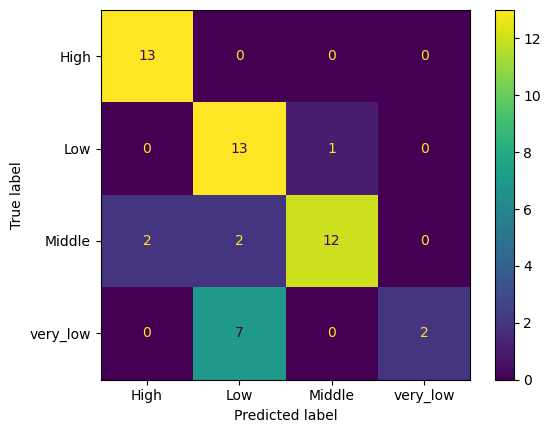

In [14]:
# Ensure 'model_pipeline' is your trained pipeline and 'X_test', 'y_test' are your test set features and labels
ConfusionMatrixDisplay.from_estimator(
    model_pipeline,  
    X_test,
    y_test,
    display_labels=model_pipeline.classes_, 
    cmap='viridis', 
    normalize=None 
)

Figure 5. Confusion Matrix Display for Test Set Predictions

# 2. Cross-validation 

In [15]:
# Perform cross-validation
X = data.drop(columns=[' UNS'])  # target column 
y = data[' UNS']  

cv_scores = pd.DataFrame(
    cross_validate(
        estimator=model_pipeline,
        X=X,
        y=y,
        cv=5,  # Number of folds in cross-validation
        return_train_score=True, 
        scoring=['accuracy'] 
    )
)

# Display the cross-validation scores
cv_scores

,fit_time,score_time,test_accuracy,train_accuracy
0,0.005093,0.005316,0.807692,0.902913
1,0.003623,0.004705,0.711538,0.878641
2,0.003577,0.004689,0.711538,0.917476
3,0.007404,0.004794,0.823529,0.917874
4,0.003484,0.005741,0.705882,0.913043


Table 7. Cross-Validation Scores for Model Accuracy

In [16]:
# Calculate the mean and standard error of the mean for the cross-validation scores
metrics = cv_scores.agg(['mean', 'sem'])

# Display the aggregated metrics
metrics


,fit_time,score_time,test_accuracy,train_accuracy
mean,0.004636,0.005049,0.752036,0.905989
sem,0.000753,0.000208,0.026095,0.007350


Table 8. Mean and Standard Error of Cross-Validation Scores

# 3. Parameter value selection

In [17]:
# Define the parameter grid for n_neighbors
param_grid = {
    "kneighborsclassifier__n_neighbors": range(2, 15, 1),  # Trying n_neighbors from 2 to 14
}

# Create a new pipeline with the preprocessor and KNeighborsClassifier without specifying n_neighbors
tune_pipeline = make_pipeline(preprocessor, KNeighborsClassifier())

tune_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['STG', 'SCG', 'STR', 'LPR',
                                                   'PEG'])],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [18]:
# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=tune_pipeline,
    param_grid=param_grid,
    cv=5,  # Number of cross-validation folds
    scoring='accuracy'  # Scoring method
)

grid_search


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['STG',
                                                                          'SCG',
                                                                          'STR',
                                                                          'LPR',
                                                                          'PEG'])],
                                                          verbose_feature_names_out=False)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(2, 15)},
             scoring='accuracy')

In [19]:
# Perform the grid search by fitting it to the data
knn_tune_grid = grid_search.fit(X, y)

# Extract the cross-validation results into a DataFrame
accuracies_grid = pd.DataFrame(knn_tune_grid.cv_results_)

# Display the grid search accuracies DataFrame
accuracies_grid.head(10)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsclassifier__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003809,0.000370,0.005204,0.000324,2,{'kneighborsclassifier__n_neighbors': 2},0.769231,0.826923,0.769231,0.784314,0.686275,0.767195,0.045644,2
1,0.003474,0.000031,0.007519,0.005601,3,{'kneighborsclassifier__n_neighbors': 3},0.807692,0.711538,0.711538,0.823529,0.705882,0.752036,0.052190,5
2,0.003462,0.000046,0.004700,0.000058,4,{'kneighborsclassifier__n_neighbors': 4},0.807692,0.884615,0.769231,0.745098,0.725490,0.786425,0.056232,1
3,0.003506,0.000074,0.004955,0.000278,5,{'kneighborsclassifier__n_neighbors': 5},0.769231,0.846154,0.692308,0.803922,0.666667,0.755656,0.067284,4
4,0.003433,0.000016,0.004793,0.000168,6,{'kneighborsclassifier__n_neighbors': 6},0.769231,0.826923,0.750000,0.784314,0.666667,0.759427,0.052848,3
5,0.003418,0.000014,0.004733,0.000109,7,{'kneighborsclassifier__n_neighbors': 7},0.711538,0.826923,0.730769,0.823529,0.647059,0.747964,0.068919,6
6,0.003454,0.000047,0.004748,0.000115,8,{'kneighborsclassifier__n_neighbors': 8},0.769231,0.807692,0.750000,0.784314,0.588235,0.739894,0.078145,8
7,0.003497,0.000085,0.004865,0.000307,9,{'kneighborsclassifier__n_neighbors': 9},0.615385,0.826923,0.730769,0.784314,0.607843,0.713047,0.088280,11
8,0.003540,0.000174,0.004727,0.000066,10,{'kneighborsclassifier__n_neighbors': 10},0.692308,0.865385,0.730769,0.803922,0.627451,0.743967,0.083373,7
9,0.003607,0.000343,0.004879,0.000222,11,{'kneighborsclassifier__n_neighbors': 11},0.557692,0.826923,0.711538,0.803922,0.549020,0.689819,0.117958,13


Table 9. Grid Search Cross-Validation Results

In [20]:
# Create a chart that plots the mean test score for each value of n_neighbors
accuracy_versus_k_grid = alt.Chart(accuracies_grid).mark_line(point=True).encode(
    x=alt.X("param_kneighborsclassifier__n_neighbors:N", title="Number of Neighbors", scale=alt.Scale(zero=False)),
    y=alt.Y("mean_test_score:Q", title="Mean Test Score", scale=alt.Scale(zero=False))
).properties(
    title="Figure 6. Mean Test Score by Number of Neighbors in KNN Grid Search"
)

# Display the chart
accuracy_versus_k_grid



alt.Chart(...)

In [21]:
# Specify the K-Nearest Neighbors classifier with 4 neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=4)

# Create a pipeline with the preprocessor and the classifier
model_pipeline = make_pipeline(preprocessor, knn_classifier)

# Fit the model pipeline to the training data
model_pipeline.fit(X_train, y_train)

test_predictions = X_test.assign(
    predicted=model_pipeline.predict(X_test)
)

# Evaluate the prediction accuracy of the model on the test set
prediction_accuracy = model_pipeline.score(X_test, y_test)

# Output the prediction accuracy
prediction_accuracy

0.7884615384615384

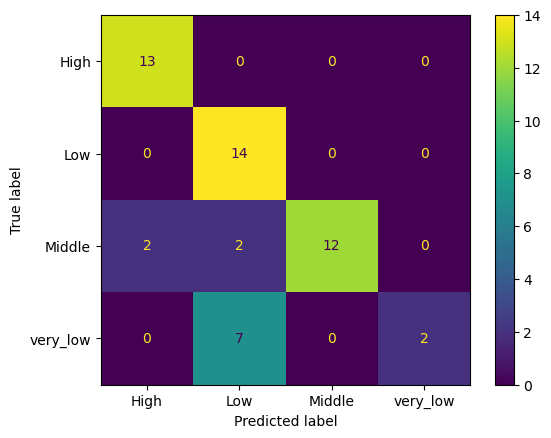

In [22]:
test_predictions['Actual UNS'] = y_test.reset_index(drop=True)

#Create the confusion matrix using the corrected labels
confusion_matrix = pd.crosstab(
    test_predictions['Actual UNS'],  # True labels
    test_predictions['predicted'],    # Predicted labels
    rownames=['Actual'], 
    colnames=['Predicted']
)

ConfusionMatrixDisplay.from_estimator(
    model_pipeline,  
    X_test,
    y_test,
    display_labels=model_pipeline.classes_,  
    cmap='viridis',
    normalize=None  
)

Figure 7. Confusion Matrix Display for Actual vs. Predicted Knowledge Levels

# Methods

        To begin with, the data needed to be wrangled and cleaned to further explore the structure of the dataset. The necessary libraries, including pandas, altair, numpy and scikit-learn, were imported. The “User Knowledge Modeling” dataset of interest was loaded from the UC Irvine Machine Learning Repository using pandas read_csv() function. The dataset was then summarized using the head() function, which displayed the first 10 rows. In our analysis, we selected all columns from the dataset as predictors since they showed no correlation with each other. This ensures that each variable provides independent information for our models. UNS values were assigned to the columns of interest which were filtered to include STG, SCG, STR, LPR, PEG, and UNS. To provide insight into potential patterns and trends in the data, we need to visualize the data. Using altair, two scatterplots were produced to visualize the relationship between two predictor variables and the target variable. The two predictor variables plotted against each other include STG vs. PEG, SCG vs. PEG, and STR vs. LPR. The points were coloured coded based on UNS. These plots were displayed side by side to allow for more effective visual analysis. STG and SCG were both plotted against PEG since all three of these variables are measurements connected to goal object materials. In contrast, LPR was plotted against STR since these two variables are measurements connected to related objects. 

        A correlation matrix was utilized to determine which predictors most accurately predict UNS. The correlation matrix of predictor variables was calculated and the index was reset to convert it into a column. Finally, the correlation matrix was transformed into a long format for altair using the .melt function. A correlation matrix heatmap was generated to examine the correlation between predictor variables, therefore helping us select relevant predictors for model training.

         After dropping UNS from the dataset, the column transformer was defined using scikit-learn’s StandardScaler() to ensure all features of the data were on the same scale. Standardizing the data before classification with K-Nearest Neighbors ensures that one variable will not dominate the other during the prediction process. The dataset was then split into training and test sets with a test size of 20% and training set of 80%. Using the K-Nearest Neighbors classifier, a k value of 3 neighbors was specified and a pipeline was created to streamline the next steps. This pipeline was fitted with the training data to ensure that predictions can be made on the test set. Next the prediction accuracy of the model on the test set can be evaluated using the score() function. Finally, a confusion matrix was generated using the corrected labels to evaluate the performance of the classifier in assessing and visualizing true positives, true negatives, false positives, and false negatives. The y-axis displays the true labels while the x-axis displays the predicted labels. Lighter colours indicate fewer occurrences while darker colors indicate more frequent occurrences.

        Cross-validation is conducted using the cross_validate() function, with an indicated cv=5 or 5 folds in the cross-validation. This will help to further assess the models general performance. The mean and standard error of the mean were obtained. The obtained accuracy values from the cross-validation are then analyzed to understand the models stability and variability across various folds.

        The parameter grid for the k-nearest neighbors (KNN) classifier was defined with a range of 2-14 neighbors to thoroughly explore the model’s performance across a variety of different values. A new preprocessor was created without specifying the number of neighbors, for a more thorough grid search process. A grid search was then performed using scikit-learn’s ‘GridSearchCV()’, which included a 5-fold cross-validation to ensure an honest evaluation of each parameter combination. The optimal number of neighbors were obtained and determined based on the highest average accuracy scores across the folds. The best parameters were then obtained and recorded for their accuracy scores, to provide insights into the model’s performance.


# Results and Discussion

        Based on Figure 1. and Figure 2., it appears that users that display high PEG possess a high UNS while users that display low PEG possess a low or very low UNS. There appears to be greater variation in exam performance for users possessing a middle UNS, though the majority of these users still perform better than users with a low or very low UNS. However, when observing the correlation between predictor variables, it appears that a user’s STG and SCG may not be strongly correlated to PEG. The data points on both Figure 1. and Figure 2. do not display a strong positive or negative linear relationship. Similarly, as indicated in Figure 3., there appears to be no correlation between LPR and STR. We are also unable to draw any conclusions regarding UNS from Figure 3. in contrast to the other figures. Overall, it appears that none of the predictor variables have a strong correlation with each other. A correlation value that is approximately 1 indicates a strong positive linear relationship between two predictor variables (Castleman, 2023). This correlation implies that one variable increases as the other variable also increases. In contrast, a correlation value that is approximately -1 indicates a strong negative linear relationship between two predictor variables.  This correlation suggests that one variable decreases as the other variable also decreases. If the correlation value is closer to 0 compared to 1 and -1, there tends to be no linear relationship between two predictor variables. In reference to the correlation matrix heatmap, all of the predictor variables appear to have a correlation value close to 0. There only appears to be a very slight negative correlation between PEG and LPR indicated by the -0.27 correlation value. As well, there is an even smaller positive correlation between PEG and STG indicated by the 0.21 correlation value. In general, the predictor variables do not have a strong correlation with each other. This conclusion is clearly in accordance with the scatterplots produced. Thus, these results match our expectations.

        Regarding the confusion matrix, it appears that 13 instances of the high knowledge level were correctly identified while only 2 instances were incorrectly identified. Similarly, it appears that 12 instances of the medium knowledge level were correctly identified while only 1 instance was incorrectly identified. This may imply that the model has relatively high accuracy in regards to greater knowledge levels. In contrast, only 2 cases of the very low knowledge level were correctly recognized while 7 cases were incorrectly recognized. Although 13 cases of the low knowledge level were correctly recognized, 9 cases were still incorrectly recognized. Additionally, the model appears to commonly misclassify very low knowledge levels as low knowledge levels. The model evidently experiences greater difficulty with classifying and differentiating between low and very low knowledge levels. Additional tuning will clearly be needed to increase the accuracy of the model. Exploring different parameters or even different models may yield better results for the low and very low knowledge levels.

        Validation (CV) is a method used to assess the predictive performance of a model, dividing the data into a series of "folds." This approach cyclically utilizes different segments of the dataset for training and validation, thus ensuring each data point is included in a test set precisely once. Such a strategy is crucial for optimizing model parameters, leading to more robust predictive performance (Tench, 2024). 

        Analysis of the mean and Standard Error of the Mean (SEM) from cross-validation results can offer essential insights into a model's efficiency and reliability. In our case, the model showcases reasonably high speed with an average training time of about 0.0038 seconds per fold, coupled with an average scoring time of approximately 0.0048 seconds per fold. These figures are reflective of a highly efficient model, achieving a mean test accuracy of around 75.2% and a mean training accuracy of about 90.6%. However, the significant differences between training accuracy and test accuracy may indicate a tendency for overfitting, suggesting that while the model performs exceedingly well on the training data, its effectiveness is somewhat diminished when encountering new, unseen data. This is further substantiated by the larger SEM for test accuracy in comparison to training accuracy, illustrating the variability in the model's generalization capabilities across different data subsets (Tench, 2024).
    
        The application of the K-Nearest Neighbors (KNN) algorithm in classification tasks necessitates careful calibration of its parameters, particularly the choice of k, the number of neighbors. With an initial setting of k=3, the model already showcased strong predictive capabilities for the 'High' and 'Low' classes. This early success led to an inquiry into the optimal k-value, bolstered by insights from Smith (2020), who emphasized the criticality of hyperparameters: "The performance of this algorithm varies largely based on the values of its hyperparameters" (Smith, 2020, p. 2). A graphical analysis of mean test scores across different k-values revealed that increasing k to 4 enhanced model accuracy significantly.


        While Smith (2020) posited a broader effective range for k, stating "The algorithm is able to classify 80% of the points in a particular file for any value of k between 5-10 perfectly" (Smith, 2020, p. 3), our targeted examination indicated that an even smaller k-value was optimal within our dataset's context. Notably, our results diverged from Smith's range, as accuracy declined beyond k=5, underscoring the model's sensitivity to this hyperparameter.

        The selected k-value of 4 emerges from our findings as the most effective in balancing the bias-variance trade-off inherent in the KNN algorithm. This evidence challenges the broader range of k-values suggested by Smith (2020) and underscores the necessity of empirical validation in hyperparameter selection. Overall this comparative of k=3 against k=4 portrayed a small enhancement in prediction accuracy despite the model’s accuracy in predicting the “middle” category remaining unchanged. The observed  increased accuracy of the model results in a shift from 76.92% with k=3, to 78.85% with k=4. This is indicative of ameliorated generalization capability with the k=4 as compared to k=3 and is also suggestive of a beneficial adjustment in the balance between bias and variance within the “User Knowledge Modeling” data set. This data also provides insights and future questions beyond the accuracy of classification methods. In reference to the disparity seen in the scatter plots, future studies should investigate why study time varies so greatly for all knowledge levels. Other factors that influence exam performance should also be explored.e explored.e explored.

## References

1. Kahraman, H., Colak, I., & Sagiroglu, S. (2013). User Knowledge Modeling [Dataset]. UC Irvine Machine Learning Repository. [https://doi.org/10.24432/C5231X](https://doi.org/10.24432/C5231X).

2. Kahraman, H. T., Sagiroglu, S., & Colak, I. (2013). The development of intuitive knowledge classifier and the modeling of domain dependent data. *Knowledge-Based Systems*, 37, 283-295. [https://doi.org/10.1016/j.knosys.2012.08.009](https://doi.org/10.1016/j.knosys.2012.08.009).

3. Ranjan, G. S. K., Verma, A., & Sudha, R. (2019). K-Nearest Neighbors and Grid Search CV Based Real Time Fault Monitoring System for Industries. [doi:10.1109/I2CT45611.2019.9033691](https://doi.org/10.1109/I2CT45611.2019.9033691).

4. Tench, C. R. (2024). Cross-validation coordinate analysis (CVCA): Performing coordinate-based meta-analysis using cross-validation. medRxiv. [https://doi.org/10.1101/2024.03.13.24304](https://doi.org/10.1101/2024.03.13.24304).

5. Castleman, K. R., & Wu, Q. (2023). Object Classification. In Elsevier eBooks (pp. 177-200). [https://doi.org/10.1016/b978-0-12-821049-9.00010-1](https://doi.org/10.1016/b978-0-12-821049-9.00010-1).
0-1
